In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv(r"C:\\Users\\kkkkk\\Downloads\\Githubupload\\customer-churn.csv")

# Let see the shape and types of features and any null values


In [23]:
df.shape
df.describe()

(7043, 21)

In [22]:
df.isnull().sum()

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#Drop the columns in which all the data in the feature if unique or same

In [15]:
df.drop(columns=['customerID'], axis =1,inplace=True)

#Let see categorical types and counts and numerical columns

In [16]:
for column in df.columns :
    print(f"{column} : {df[column].unique()} :{df[column].value_counts().unique()}")
   

gender : ['Female' 'Male'] :[3555 3488]
SeniorCitizen : [0 1] :[5901 1142]
Partner : ['Yes' 'No'] :[3641 3402]
Dependents : ['No' 'Yes'] :[4933 2110]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] :[613 362 238 200 176 170 133 131 123 119 117 116 110 109 100  99  98  97
  95  94  90  89  88  87  85  80  79  76  74  73  72  71  70  69  68  67
  66  65  64  63  61  60  59  57  56  51  50  11]
PhoneService : ['No' 'Yes'] :[6361  682]
MultipleLines : ['No phone service' 'No' 'Yes'] :[3390 2971  682]
InternetService : ['DSL' 'Fiber optic' 'No'] :[3096 2421 1526]
OnlineSecurity : ['No' 'Yes' 'No internet service'] :[3498 2019 1526]
OnlineBackup : ['Yes' 'No' 'No internet service'] :[3088 2429 1526]
DeviceProtection : ['No' 'Yes' 'No internet service'] :[3095 2422 1526]
TechSupport : ['No' 'Yes' 'No internet s

#Univariate Analysis for numerical features

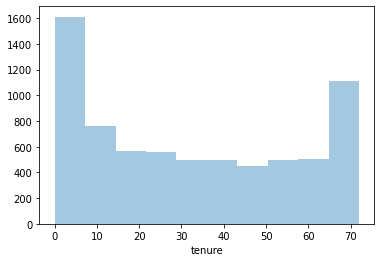

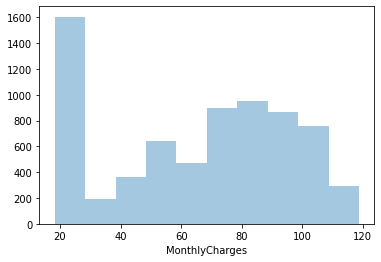

In [21]:
sns.distplot(df['tenure'], kde=False, bins=10)
plt.show()
sns.distplot(df['MonthlyCharges'], kde=False, bins=10)
plt.show()

Categorical values types and count in each feature f1,f2( X values) in Seaborn to see the distribution

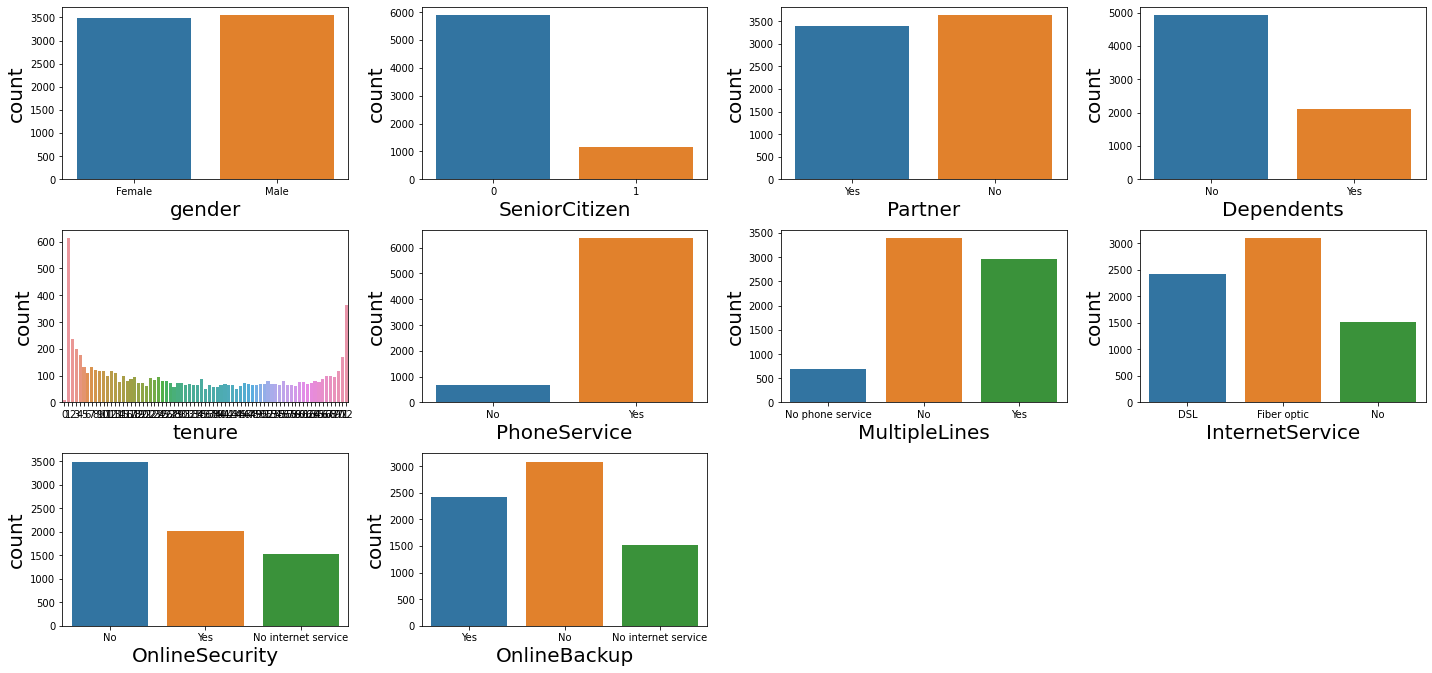

In [56]:
#categorical values  for f1,f2,f3,f4 ( x values)
plotnumber=1
plt.figure(figsize=(20,12))
for column in df:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(column,data=df)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Univariate feature analysis of categorical features with respect to Churn

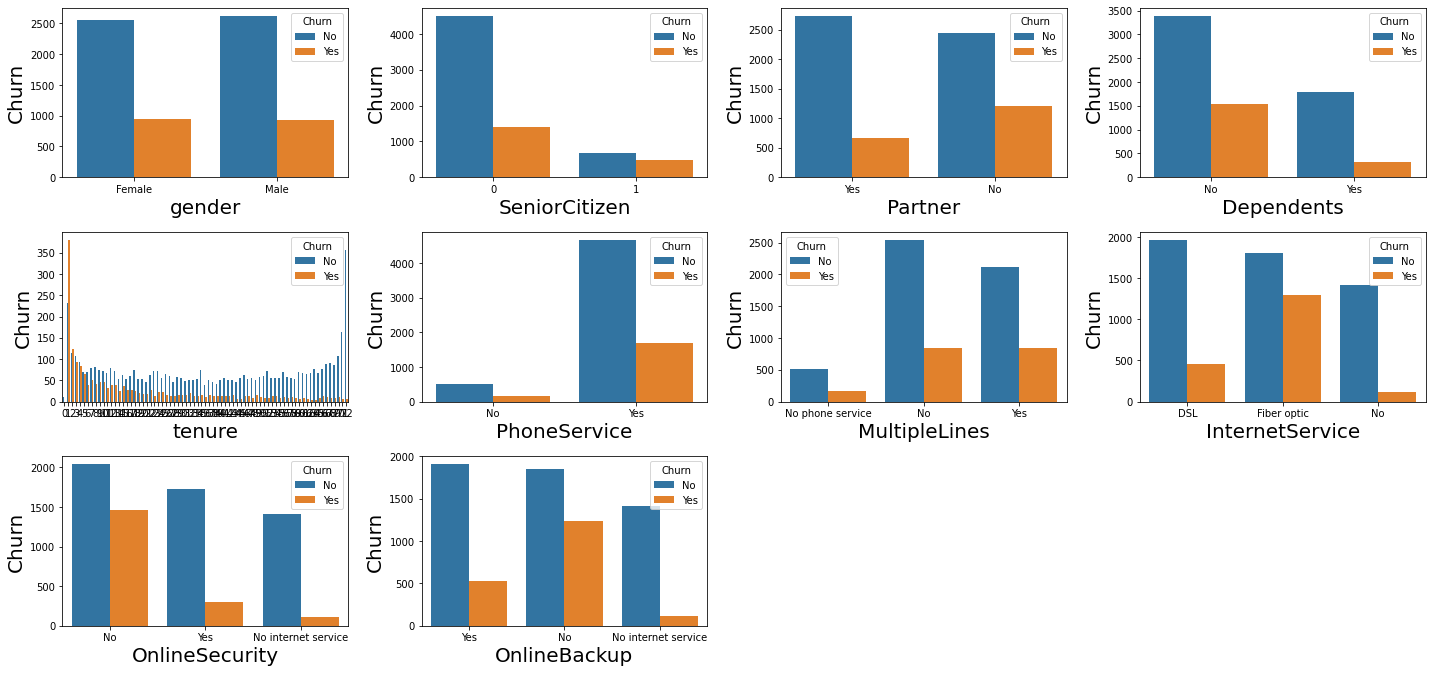

In [25]:
#independent categorical values  Vs Dependent Binary Categorical value
# Review behaviour of Churn with categorical values
plotnumber=1
plt.figure(figsize=(20,12))
for column in df:
    if plotnumber<=10 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(x=column, hue='Churn',data=df)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Churn',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observations
#Both Male and female customer churn exited equally.
#Those who are not senior citizens, having  no partners and no dependents are exited 
#Those who have phone service,have fiberoptics as internetservice with no online security and no online backup have exited


# Bivariate feature Analysis x1,x2(Tenure,Monthly charges) with respect to Y(Churn)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

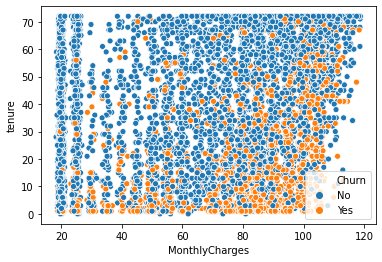

In [28]:
sns.scatterplot(x='MonthlyCharges',y= 'tenure',hue='Churn', data=df) 

In [ ]:
As the MonthlyCharges increased , customer churn is heavily increased and tenure increased Customer churn also increased
both tenure and Monthly charges are important features for Churn 

# check if correlation exists in the numerical variables
Tenure and Monthly charges are not correlated and are < 0.4 , Total charges is a calculated columns and is not required for correlation

In [73]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

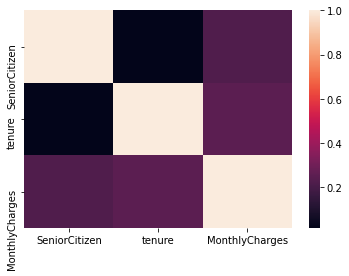

In [74]:
#Heat map gives results only for numerical featurevalues
sns.heatmap(df.corr())

# Let us check the composition of Dependent variable Churn 

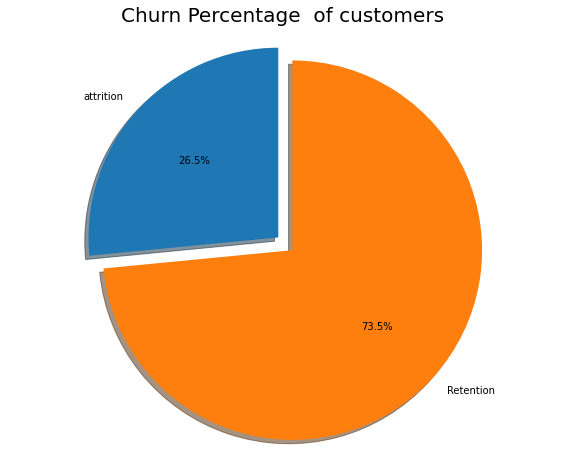

In [29]:
#implement pie chart
labels = 'attrition', 'Retention'
sizes = [df.Churn[df['Churn']=='Yes'].count(), df.Churn[df['Churn']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Churn Percentage  of customers ", size = 20)
plt.show()


In [ ]:
26% percent of customer churn is more and have to act with measures to retain the customers.
To bring new customers which has 20% additional cost over retaining existing customers.